In [ ]:
# import system libs
import os
import time
import shutil
import itertools

# import data handling tools
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import categorical_crossentropy


print ('modules loaded')

modules loaded


In [ ]:
data_dir = '/content/drive/MyDrive/hmnist_28_28_RGB.csv'
data = pd.read_csv(data_dir)
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [ ]:
Label = data["label"]
Data = data.drop(columns=["label"])
data["label"].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
Data, Label  = oversample.fit_resample(Data, Label)
Data = np.array(Data).reshape(-1, 28, 28, 3)


In [ ]:
Label.value_counts()

2    6705
4    6705
3    6705
6    6705
5    6705
1    6705
0    6705
Name: label, dtype: int64

In [ ]:
Label = np.array(Label)
Label.shape

(46935,)

In [ ]:
classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'),
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

In [ ]:
model = keras.models.Sequential()

# Create Model Structure
model.add(keras.layers.Input(shape=[28, 28, 3]))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=7, activation='softmax'))

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=5,
                    batch_size=128,
                    callbacks=[learning_rate_reduction],
                    validation_data=(X_test , y_test))

Epoch 1/5
276/276 [==============================] - 222s 791ms/step - loss: 1.1669 - accuracy: 0.5696 - val_loss: 1.6489 - val_accuracy: 0.4380 - lr: 0.0010
Epoch 2/5
276/276 [==============================] - 220s 798ms/step - loss: 0.4773 - accuracy: 0.8348 - val_loss: 0.3926 - val_accuracy: 0.8631 - lr: 0.0010
Epoch 3/5
276/276 [==============================] - 239s 865ms/step - loss: 0.2828 - accuracy: 0.9031 - val_loss: 0.6230 - val_accuracy: 0.7941 - lr: 0.0010
Epoch 4/5
276/276 [==============================] - 217s 787ms/step - loss: 0.1978 - accuracy: 0.9312 - val_loss: 0.3509 - val_accuracy: 0.8855 - lr: 0.0010
Epoch 5/5
276/276 [==============================] - 221s 800ms/step - loss: 0.1457 - accuracy: 0.9506 - val_loss: 0.3287 - val_accuracy: 0.8933 - lr: 0.0010


In [ ]:
pred = model1.predict(X_test)
pred[23]

367/367 [==============================] - 20s 51ms/step


array([5.3978365e-06, 8.7111976e-06, 8.5383417e-06, 1.6960605e-04,
       2.7191279e-06, 9.9977827e-01, 2.6678388e-05], dtype=float32)

In [ ]:
X_test[23].shape

(28, 28, 3)

In [ ]:
y_true = np.array(y_test)
y_predict = model.predict(X_test)

y_predict = np.argmax(y_predict , axis=1)
y_true = np.argmax(y_true , axis=1)

367/367 [==============================] - 21s 57ms/step


In [ ]:
classes_labels = []
for key in classes.keys():
    classes_labels.append(key)

print(classes_labels)

[4, 6, 2, 1, 5, 0, 3]


In [ ]:
y_predict[45]

5

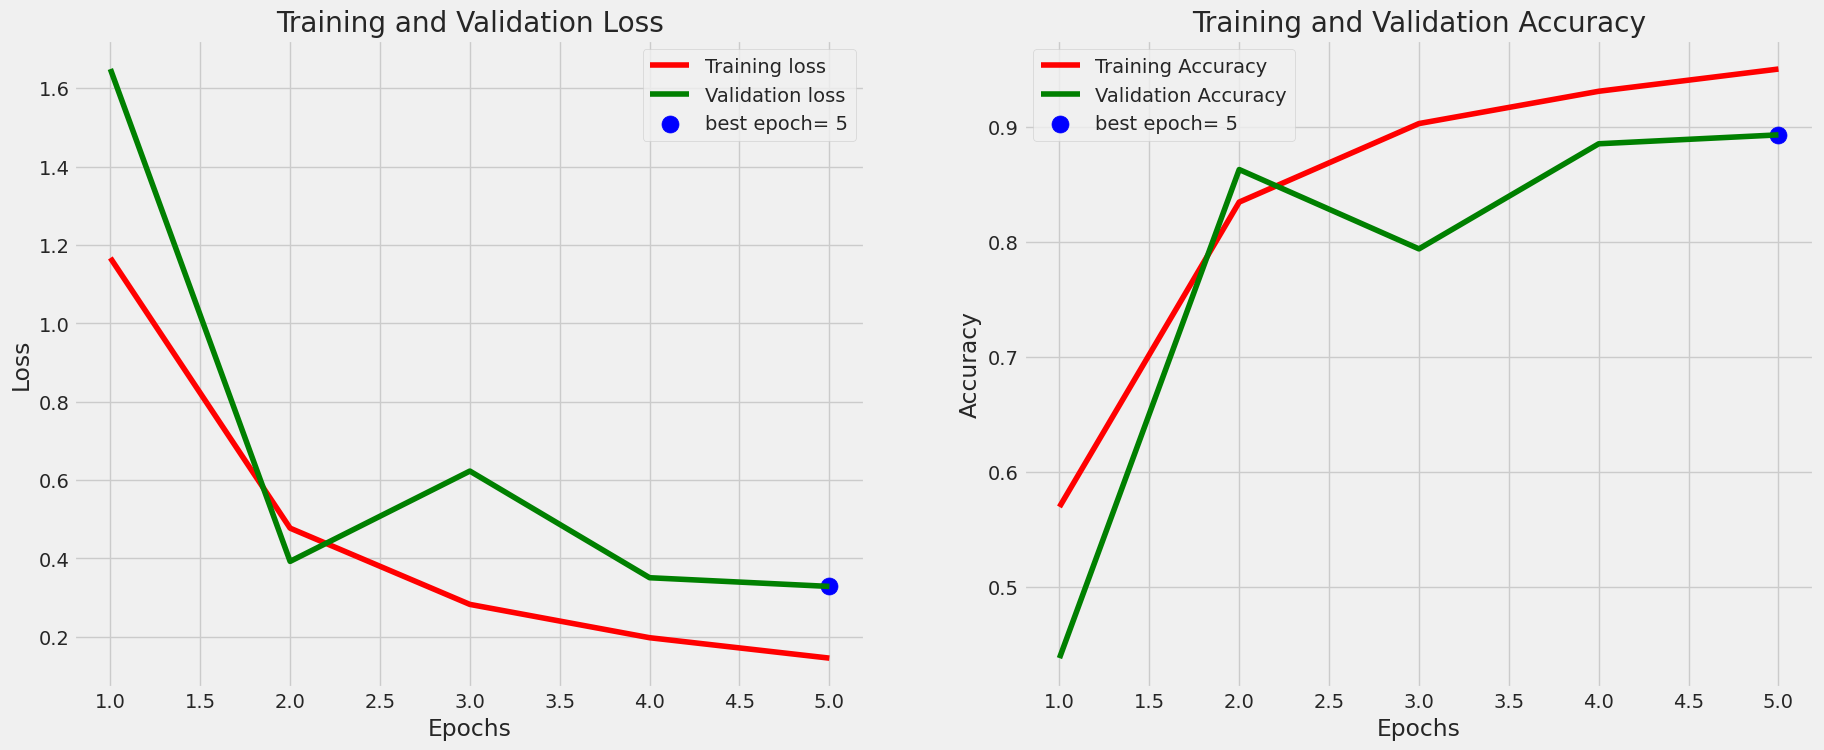

In [ ]:
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

plot_training(history)

In [ ]:
train_score = model.evaluate(X_train, y_train, verbose= 1)
test_score = model.evaluate(X_test, y_test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

367/367 [==============================] - 18s 49ms/step - loss: 0.3287 - accuracy: 0.8933
Train Loss:  0.28032875061035156
Train Accuracy:  0.9060822129249573
********************
Test Loss:  0.3286673426628113
Test Accuracy:  0.8933015465736389


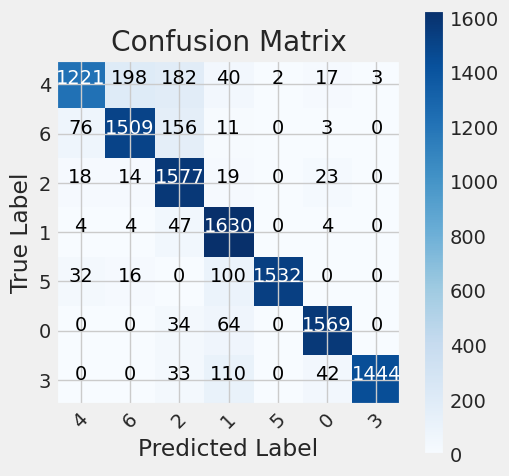

In [ ]:
# Confusion matrix
cm = cm = confusion_matrix(y_true, y_predict, labels=classes_labels)

plt.figure(figsize= (5,5))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt

#pixel_data = X_train[23]  # Assuming X_train[0] contains the image data
#plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
#plt.imshow(pixel_data, cmap='gray', interpolation='nearest')  # Use a grayscale colormap and nearest-neighbor interpolation
#plt.axis('off')
#plt.show()


In [ ]:
history = tf.keras.models.load_model("Skin_cancer.h5")

1/1 [==============================] - 0s 41ms/step


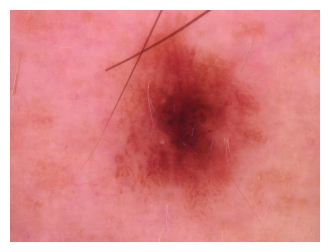

Melanoncytic nevi (nv) : Non Malignant


In [ ]:
from PIL import Image
import numpy as np

# Load the image
image = Image.open('/content/drive/MyDrive/ISIC_0024306.jpg')  # Replace 'your_image.jpg' with your image file path

# Resize the image to 28x28 pixels while maintaining the aspect ratio
image_array = image.resize((28, 28))
image_array = np.array(image_array)
image_array = image_array.reshape(-1,28,28,3)

# If your image is grayscale, convert it to RGB (3 channels)
if len(image_array.shape) == 2:
    image_array = np.stack((image_array,) * 3, axis=-1)

img_pred = model.predict(image_array)
predicted = np.argmax(img_pred , axis=1)[0]

def predicted_value(predicted):
  if predicted == 0:
    print("Actinic keratoses and intraepithelial carcinomae (akiec) : Non Malignant")
  elif predicted == 1:
    print("Basal cell carcinoma (bcc) : Malignant")
  elif predicted == 2:
    print("Benign keratosis-like lesions (bkl) : Non Malignant")
  elif predicted == 3:
    print("Dermatofibroma (df) : Non Malignant")
  elif predicted == 4:
    print("Melanoncytic nevi (nv) : Non Malignant")
  elif predicted == 5:
    print("Pyogenoc granulomas and hemorrhage (vasc) : Non Malignant")
  else:
    print("Melanoma (mel) : Malignant")

# Now, image_array is a NumPy array representing the resized image with shape (28, 28, 3)
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.imshow(image)
plt.axis('off')
plt.show()

predicted_value(predicted)

In [ ]:
string = "abc123"
string[::-1]

'321cba'

In [ ]:
def binary(target, arr):
  left = 0
  right = len(arr) - 1
  while left <= right:
    mid = (left + right)//2
    if arr[mid] == target:
      return mid
    elif arr[mid] < target:
      left = mid + 1
    else:
      right = mid - 1
  return -1

arr = (input("Enter array: "))
arr = list(map(int, arr.split()))
arr.sort()
target = int(input("Enter the target number: "))
result = binary(target, arr)
if result == -1:
  print("Not Found")
else:
  print(f"Found at position {result+1}")

Enter array: 34 45 56 67 78
Enter the target number: 34
Found at position 1


In [ ]:
def prime(n):
  if n < 1:
    return False
  elif n == 2:
    return True
  else:
    for i in range(2, int(n**0.5) + 1):
      if n % i == 0:
        return False
    return True

n = int(input("Enter the number: "))
result = prime(n)
if result:
  print("Prime")
else:
  print("Not Prime")

Enter the number: 23
Prime


In [ ]:
import pandas as pd
data = {'Name': ['Alice', 'Bob'], 'Age': [25, 30]}
df = pd.DataFrame(data)
df['Salary'] = [50000, 60000]
df['Age'] = df['Age'] + 1
df.pivot_table(index='Age', values='Salary', aggfunc='mean')


,Salary
Age,
26,50000.0
31,60000.0
